In [ ]:
!gdown "1pv6YiFFuQ8VtJIvZyZKTtwqbF74GxniI"

Downloading...
From: https://drive.google.com/uc?id=1pv6YiFFuQ8VtJIvZyZKTtwqbF74GxniI
To: /content/sample_data_for_user_663960.csv
100% 12.1M/12.1M [00:00<00:00, 76.3MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from datetime import datetime
import pytz
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('sample_data_for_user_663960.csv')

In [ ]:
dataset = dataset[['rcvdTm','sloc']]

In [ ]:
def date_time_transform(data):
  return data[11:21] + " " + data[22:-3]

In [ ]:
dataset['date_time'] = dataset['rcvdTm'].transform(date_time_transform)

In [ ]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'])

In [ ]:
size = len(dataset)
size

38846

In [ ]:
df = pd.DataFrame()

df['customerLocationState'] = ''
df['startTime'] = ''
df['endTime'] = ''
df['duration'] = ''

In [ ]:
startDate = dataset['date_time'][0]

for ind in range(1,size):
    if  dataset['sloc'][ind] != dataset['sloc'][ind-1]:
        tup = {'customerLocationState' : dataset['sloc'][ind-1],'startTime':startDate,'endTime':dataset['date_time'][ind-1] , 'duration': startDate - dataset['date_time'][ind-1]  }
        startDate = dataset['date_time'][ind-1]
        df1 = pd.DataFrame(tup, index=[0])
        df = pd.concat([df,df1],ignore_index = True)
        df.reset_index()

In [ ]:
df['customerLocationState']=df.customerLocationState.str.replace('Hallway','Bigroom' ).replace('Livingroom','Bigroom')

In [ ]:
df.head(10)

,customerLocationState,startTime,endTime,duration
0,Bedroom,2021-08-31 23:39:33,2021-08-31 21:46:05,0 days 01:53:28
1,Bigroom,2021-08-31 21:46:05,2021-08-31 21:40:46,0 days 00:05:19
2,Bedroom,2021-08-31 21:40:46,2021-08-31 21:39:59,0 days 00:00:47
3,Bigroom,2021-08-31 21:39:59,2021-08-31 21:39:45,0 days 00:00:14
4,Stairs,2021-08-31 21:39:45,2021-08-31 21:38:29,0 days 00:01:16
5,Bigroom,2021-08-31 21:38:29,2021-08-31 21:37:36,0 days 00:00:53
6,Stairs,2021-08-31 21:37:36,2021-08-31 21:37:13,0 days 00:00:23
7,Kitchen,2021-08-31 21:37:13,2021-08-31 21:37:06,0 days 00:00:07
8,Bigroom,2021-08-31 21:37:06,2021-08-31 21:35:34,0 days 00:01:32
9,Kitchen,2021-08-31 21:35:34,2021-08-31 21:35:17,0 days 00:00:17


In [ ]:

le=LabelEncoder()
df['Location'] = le.fit_transform(df['customerLocationState'])
df['durationMinutes'] = df['duration'].dt.total_seconds()/60

df['DateStart'] = pd.to_datetime(df['startTime']).dt.date
df['YearStart'] = pd.to_datetime(df['startTime']).dt.year
df['MonthStart'] = pd.to_datetime(df['startTime']).dt.month
df['weekStart'] = pd.to_datetime(df['startTime']).dt.week
df['DayStart'] = pd.to_datetime(df['startTime']).dt.day
df['WeekYear'] = df['startTime'].apply(lambda x: "%d/%d" % (x.week, x.year))
df['MonthYear'] = df['startTime'].apply(lambda x: "%d/%d" % (x.month, x.year))

df['Dayofweekencoded'] = pd.to_datetime(df['startTime']).dt.dayofweek
df['Dayofweeknames'] = pd.to_datetime(df['startTime']).dt.day_name()
df['TimeStart'] = pd.to_datetime(df['startTime']).dt.time
df['hourStart'] = pd.to_datetime(df['startTime']).dt.hour
df['hourend'] = pd.to_datetime(df['endTime']).dt.hour
df['hourdiff'] = df['hourend']-df['hourStart']

df = df.sort_values(by='startTime',ascending=True)
df['total_freqbyday'] = df.groupby(['DateStart','customerLocationState'])['customerLocationState'].transform('count')
df['freq_cumbyday'] = df.groupby(['DateStart','customerLocationState'])['customerLocationState'].cumcount()+1
df['freq_cumbyHourofDay'] = df.groupby(['DateStart','customerLocationState','hourStart'])['customerLocationState'].cumcount()+1
df['freq_totalbyHourofDay'] = df.groupby(['DateStart','customerLocationState','hourStart'])['customerLocationState'].transform('count')
df['duration_cumusumbyday'] = df.groupby(['DateStart','customerLocationState'])['durationMinutes'].apply(lambda x: x.cumsum())
df['cumdurationlocationHourofDay'] = df.groupby(['DateStart','customerLocationState','hourStart'])['durationMinutes'].cumsum()
df['duration_totalsumbyday'] = df.groupby(['DateStart','customerLocationState'])['durationMinutes'].transform('sum')
df['event']= np.where((df['customerLocationState']!=df['customerLocationState'].shift())
                      ,df['customerLocationState'].shift()+'to'+df['customerLocationState'],'nochange')
df['Event_cumusumbyday'] = df.groupby(['DateStart','customerLocationState','event'])['event'].cumcount()+1

la=LabelEncoder()
df=df.dropna()
df=df.drop_duplicates()
df['eventcoded'] = la.fit_transform(df['event'])
df.columns.values

array(['customerLocationState', 'startTime', 'endTime', 'duration',
       'Location', 'durationMinutes', 'DateStart', 'YearStart',
       'MonthStart', 'weekStart', 'DayStart', 'WeekYear', 'MonthYear',
       'Dayofweekencoded', 'Dayofweeknames', 'TimeStart', 'hourStart',
       'hourend', 'hourdiff', 'total_freqbyday', 'freq_cumbyday',
       'freq_cumbyHourofDay', 'freq_totalbyHourofDay',
       'duration_cumusumbyday', 'cumdurationlocationHourofDay',
       'duration_totalsumbyday', 'event', 'Event_cumusumbyday',
       'eventcoded'], dtype=object)

In [ ]:
from sklearn import preprocessing
#selecting and standardizing data
data_n = df[[
       'Location', 'durationMinutes',
        'hourStart',
       'hourend', 'hourdiff', 'total_freqbyday', 'freq_cumbyday',
       'freq_cumbyHourofDay', 'freq_totalbyHourofDay',
       'duration_cumusumbyday', 'cumdurationlocationHourofDay',
       'duration_totalsumbyday',  'eventcoded']]
scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(data_n)
data_n = pd.DataFrame(np_scaled)

# importanting parameters and train/test size
prediction_time = 1
testdatasize = 4000
unroll_length = 20
testdatacut = testdatasize + unroll_length  + 1

#train data
x_train = data_n[0:-prediction_time-testdatacut].values
y_train = data_n[prediction_time:-testdatacut  ][0].values

# test data
x_test = data_n[0-testdatacut:-prediction_time].values
y_test = data_n[prediction_time-testdatacut:  ][0].values


#unroll: sequence of 20 previous data points for each data points
def unroll(data,sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

# adapting datasets for the sequence data shape
x_train = unroll(x_train,unroll_length)
x_test  = unroll(x_test,unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]

# shape
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (8612, 20, 13)
y_train (8612,)
x_test (4000, 20, 13)
y_test (4000,)


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Solution via Stacked LSTM

def build_model():
    model = tf.keras.Sequential()
    model.add(layers.LSTM(200, activation='relu',return_sequences=True, input_shape=(20, 13)))
    model.add(layers.LSTM(100, activation='relu',return_sequences=True))
    model.add(layers.LSTM(50, activation='relu',return_sequences=True))
    model.add(layers.LSTM(25, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1))

    optimizer =tf.keras.optimizers.Adam()

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
model = build_model()

# Training model

In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=3028,
    epochs=20,
    validation_split=0.1,verbose=1)

Epoch 1/20
3/3 [==============================] - 13s 906ms/step - loss: 0.9967 - mae: 0.9183 - mse: 0.9967 - val_loss: 1.0201 - val_mae: 0.9326 - val_mse: 1.0201
Epoch 2/20
3/3 [==============================] - 1s 203ms/step - loss: 0.9960 - mae: 0.9172 - mse: 0.9960 - val_loss: 1.0195 - val_mae: 0.9328 - val_mse: 1.0195
Epoch 3/20
3/3 [==============================] - 1s 192ms/step - loss: 0.9958 - mae: 0.9182 - mse: 0.9958 - val_loss: 1.0192 - val_mae: 0.9329 - val_mse: 1.0192
Epoch 4/20
3/3 [==============================] - 1s 222ms/step - loss: 0.9960 - mae: 0.9179 - mse: 0.9960 - val_loss: 1.0189 - val_mae: 0.9325 - val_mse: 1.0189
Epoch 5/20
3/3 [==============================] - 1s 188ms/step - loss: 0.9950 - mae: 0.9175 - mse: 0.9950 - val_loss: 1.0174 - val_mae: 0.9330 - val_mse: 1.0174
Epoch 6/20
3/3 [==============================] - 1s 191ms/step - loss: 0.9949 - mae: 0.9190 - mse: 0.9949 - val_loss: 1.0165 - val_mae: 0.9317 - val_mse: 1.0165
Epoch 7/20
3/3 [===========

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("modelAnomalyLSTM.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelAnomalyLSTM.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.models import model_from_json
# loading json and creating model
json_file = open('modelAnomalyLSTM.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loading weights into new model
loaded_model.load_weights("modelAnomalyLSTM.h5")
print("Loaded model from disk")

Loaded model from disk


125/125 [==============================] - 2s 14ms/step


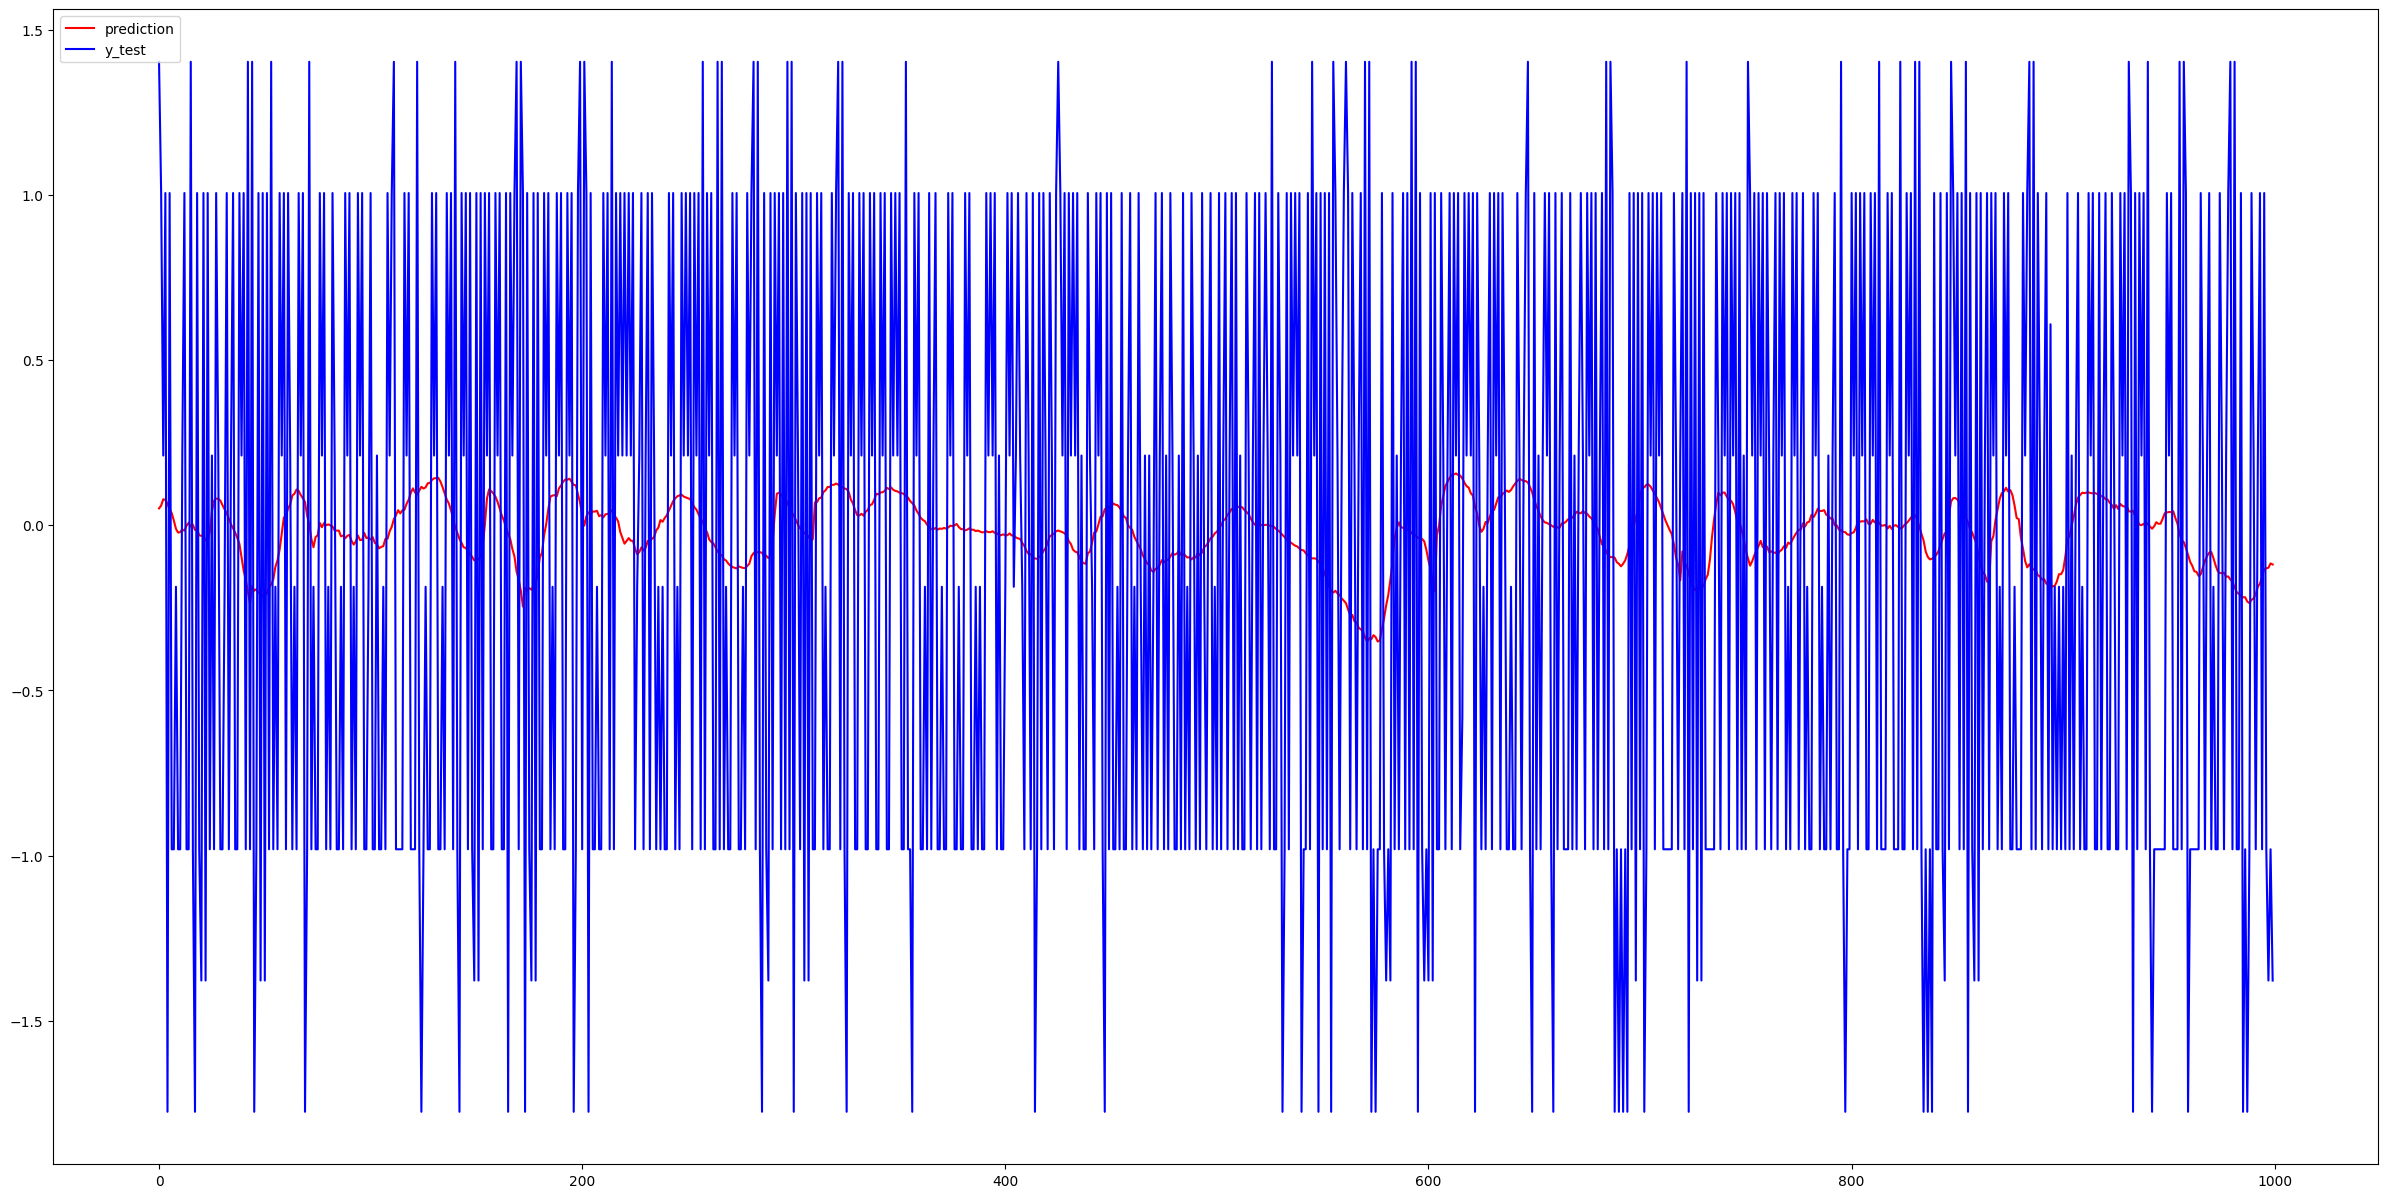

In [ ]:
# creating the list of difference between prediction and test data
diff=[]
ratio=[]
p = loaded_model.predict(x_test)

for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
p1=p[3000:4000]
y_test1=y_test[3000:4000]

# plot the prediction and the reality (for the test data)
fig, axs = plt.subplots(figsize=(30,15))

axs.plot(p1,color='red', label='prediction')
axs.plot(y_test1,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.show()

The model is not fitting well on the dataset, but that can be improved by fine-tuning.

In [ ]:
outliers_fraction=0.01
diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction*len(diff))
threshold = diff.nlargest(number_of_outliers).min()

test = (diff >= threshold).astype(int)

complement = pd.Series(0, index=np.arange(len(data_n)-testdatasize))

df['anomaly27'] = complement.append(test, ignore_index='True')
print(df['anomaly27'].value_counts())

0    12614
1       40
Name: anomaly27, dtype: int64


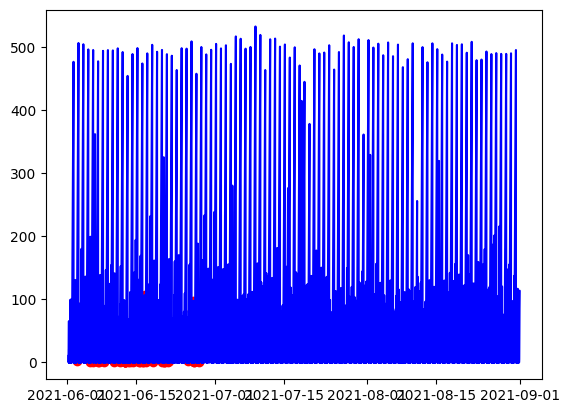

In [ ]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly27'] == 1, ['startTime', 'durationMinutes']]

ax.plot(df['startTime'], df['durationMinutes'], color='blue')
ax.scatter(a['startTime'],a['durationMinutes'], color='red')

plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='startTime', y="durationMinutes",color="anomaly27")
fig.show()

# Fine Tuning

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 10.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:

def build_model(hp):

    model = tf.keras.Sequential()
    model.add(layers.LSTM(hp.Int('input_unit',min_value=32,max_value=224,step=32), activation='relu',return_sequences=True, input_shape=(20, 13)))

    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(layers.LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=224,step=32),return_sequences=True))

    model.add(layers.LSTM(hp.Int('layer_2_neurons',min_value=25,max_value=32,step=10), activation='relu'))

    model.add(layers.Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))

    model.add(layers.Dense(20, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.add(layers.Dense(10, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.add(layers.Dense(1))

    optimizer =tf.keras.optimizers.Adam()

    model.compile(loss='mse',
                optimizer=hp.Choice('optimizer',values=['adam', 'RMSprop','Adadelta'],default='adam'),
                metrics=['mae', 'mse'])
    return model

In [ ]:
tuner= RandomSearch(
        build_model,
        objective='mse',
        max_trials=2,
        executions_per_trial=1
        )

In [ ]:
tuner.search(
        x=x_train,
        y=y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_test,y_test),
)

Trial 2 Complete [00h 02m 28s]
mse: 0.9991656541824341

Best mse So Far: 0.995278537273407
Total elapsed time: 00h 05m 59s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

Training Best model

In [ ]:
best_model.fit(
    x_train,
    y_train,
    batch_size=3028,
    epochs=100,
    validation_split=0.1,verbose=1)

Epoch 1/100
3/3 [==============================] - 17s 2s/step - loss: 0.9924 - mae: 0.9113 - mse: 0.9924 - val_loss: 1.0121 - val_mae: 0.9234 - val_mse: 1.0121
Epoch 2/100
3/3 [==============================] - 1s 207ms/step - loss: 0.9922 - mae: 0.9112 - mse: 0.9922 - val_loss: 1.0116 - val_mae: 0.9231 - val_mse: 1.0116
Epoch 3/100
3/3 [==============================] - 1s 288ms/step - loss: 0.9930 - mae: 0.9118 - mse: 0.9930 - val_loss: 1.0114 - val_mae: 0.9232 - val_mse: 1.0114
Epoch 4/100
3/3 [==============================] - 1s 246ms/step - loss: 0.9933 - mae: 0.9121 - mse: 0.9933 - val_loss: 1.0113 - val_mae: 0.9235 - val_mse: 1.0113
Epoch 5/100
3/3 [==============================] - 1s 294ms/step - loss: 0.9928 - mae: 0.9121 - mse: 0.9928 - val_loss: 1.0115 - val_mae: 0.9241 - val_mse: 1.0115
Epoch 6/100
3/3 [==============================] - 1s 293ms/step - loss: 0.9932 - mae: 0.9124 - mse: 0.9932 - val_loss: 1.0118 - val_mae: 0.9246 - val_mse: 1.0118
Epoch 7/100
3/3 [=======

In [ ]:
model_json = best_model.to_json()
with open("bestModelAnomalyLSTM.json", "w") as json_file:
    json_file.write(model_json)

best_model.save_weights("bestModelAnomalyLSTM.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
json_file = open('bestModelAnomalyLSTM.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("bestModelAnomalyLSTM.h5")
print("Loaded model from disk")

Loaded model from disk


125/125 [==============================] - 3s 10ms/step


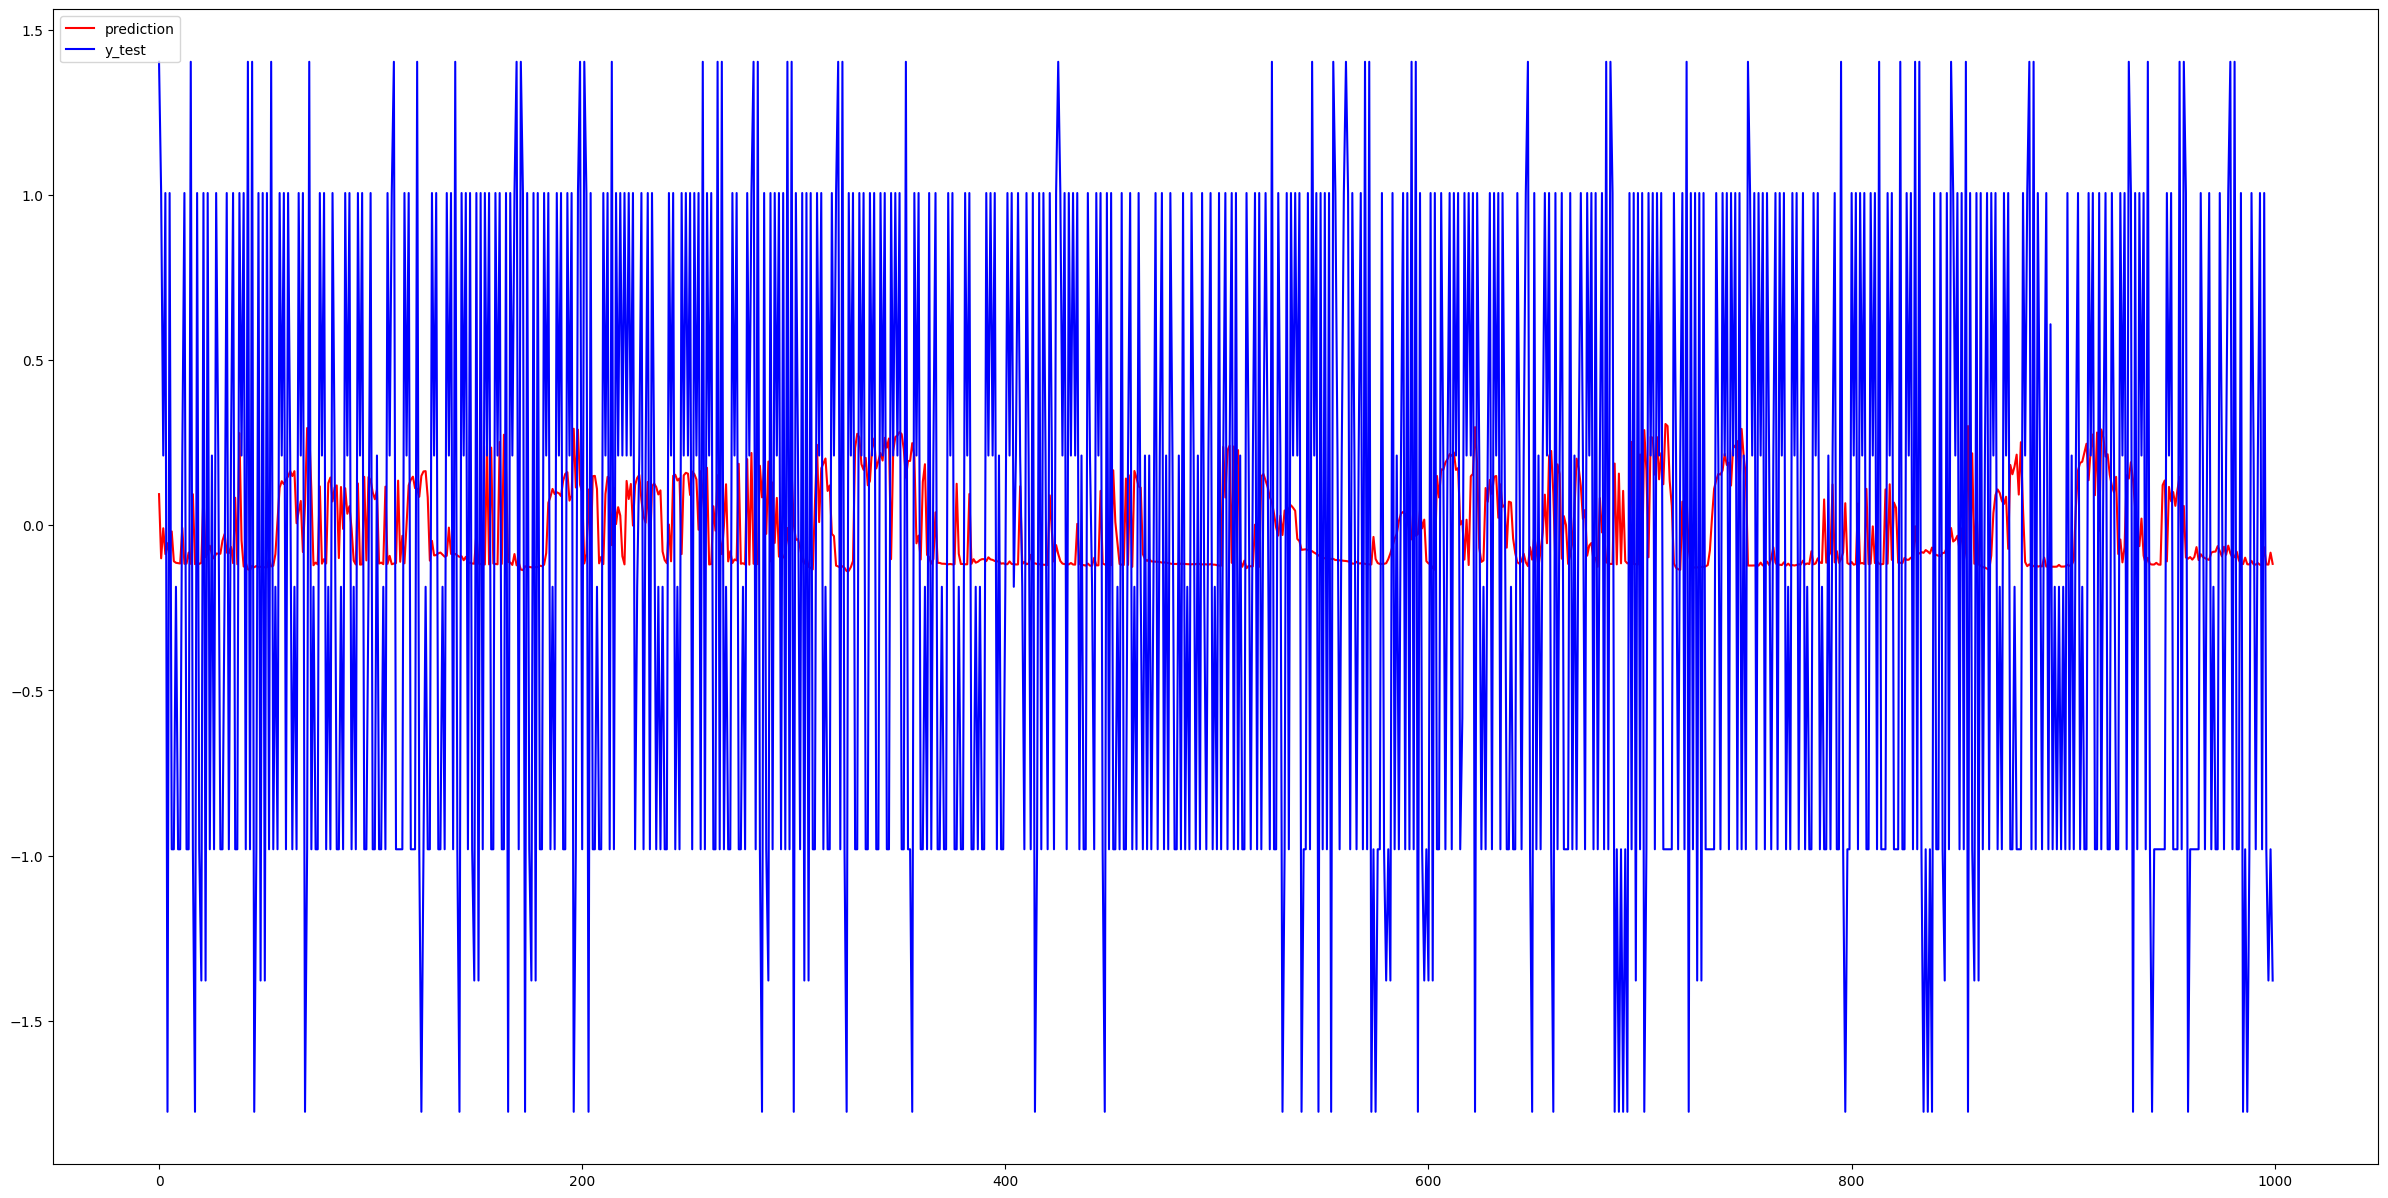

In [ ]:
diff=[]
ratio=[]
p = loaded_model.predict(x_test)

for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
p1=p[3000:4000]
y_test1=y_test[3000:4000]

fig, axs = plt.subplots(figsize=(30,15))

axs.plot(p1,color='red', label='prediction')
axs.plot(y_test1,color='blue', label='y_test')
plt.legend(loc='upper left')
plt.show()

In [ ]:
outliers_fraction=0.01
diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction*len(diff))
threshold = diff.nlargest(number_of_outliers).min()

test = (diff >= threshold).astype(int)

complement = pd.Series(0, index=np.arange(len(data_n)-testdatasize))

df['anomaly27'] = complement.append(test, ignore_index='True')
print(df['anomaly27'].value_counts())

0    12614
1       40
Name: anomaly27, dtype: int64


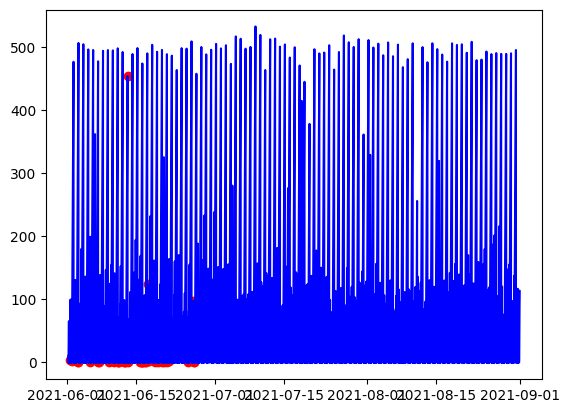

In [ ]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly27'] == 1, ['startTime', 'durationMinutes']] #anomaly

ax.plot(df['startTime'], df['durationMinutes'], color='blue')
ax.scatter(a['startTime'],a['durationMinutes'], color='red')

plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='startTime', y="durationMinutes",color="anomaly27")
fig.show()

# Conclusion

-The performance of LSTM is comparable to that of unsupervised models.

-Accuracy can be further increased by feeding it more data with precise anomaly behaviour.